In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

In [2]:
!pip install yfinance

     |████████████████████████████████| 63 kB 768 kB/s 
     |████████████████████████████████| 6.4 MB 13.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import datetime
import yfinance as y
%matplotlib inline

In [4]:
start  = datetime.datetime(2015,1,1)
end = datetime.datetime(2022,2,14)

In [5]:
ativo = 'goll4.sa'

In [6]:
ativo = y.download(ativo, start, end)

[*********************100%***********************]  1 of 1 completed


In [7]:
gol_df = ativo

In [8]:
gol_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.970000,15.200000,14.610000,14.990000,14.990000,901900
2015-01-05,14.900000,15.010000,14.410000,14.850000,14.850000,1272500
2015-01-06,14.750000,15.210000,14.650000,15.210000,15.210000,2183500
2015-01-07,15.150000,15.330000,14.550000,14.550000,14.550000,1846900
2015-01-08,14.410000,14.650000,14.200000,14.270000,14.270000,1569500
...,...,...,...,...,...,...
2022-02-07,17.480000,17.600000,17.010000,17.209999,17.209999,5170700
2022-02-08,17.309999,17.719999,17.110001,17.549999,17.549999,3601300
2022-02-09,17.639999,18.440001,17.430000,18.290001,18.290001,7076100


In [9]:
gol_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1768 entries, 2015-01-02 to 2022-02-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1768 non-null   float64
 1   High       1768 non-null   float64
 2   Low        1768 non-null   float64
 3   Close      1768 non-null   float64
 4   Adj Close  1768 non-null   float64
 5   Volume     1768 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.7 KB


In [10]:
gol_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1.768000e+03
mean,15.824044,16.210696,15.417738,15.786867,15.786867,5.034962e+06
std,9.725514,9.904858,9.538218,9.718240,9.718240,4.733591e+06
min,1.160000,1.180000,1.130000,1.160000,1.160000,0.000000e+00
25%,7.750000,7.887500,7.600000,7.730000,7.730000,1.976925e+06
50%,14.670000,15.005000,14.290000,14.640000,14.640000,3.573100e+06
75%,22.155000,22.590000,21.502500,22.042500,22.042500,6.391050e+06
max,43.669998,44.619999,41.310001,43.790001,43.790001,4.368050e+07


In [11]:
gol_df[gol_df['Close']>= 43.79]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-01,41.25,44.619999,41.25,43.790001,43.790001,6664200


In [12]:
gol_df[(gol_df['Close'] >= 1.15) & (gol_df['Close'] <= 1.16)]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-22,1.2,1.26,1.14,1.16,1.16,3830600


In [13]:
gol_df.to_csv('gol.csv')

In [14]:
gol_df2 = pd.read_csv('gol.csv')

In [15]:
gol_df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.970000,15.200000,14.610000,14.990000,14.990000,901900
1,2015-01-05,14.900000,15.010000,14.410000,14.850000,14.850000,1272500
2,2015-01-06,14.750000,15.210000,14.650000,15.210000,15.210000,2183500
3,2015-01-07,15.150000,15.330000,14.550000,14.550000,14.550000,1846900
4,2015-01-08,14.410000,14.650000,14.200000,14.270000,14.270000,1569500
...,...,...,...,...,...,...,...
1763,2022-02-07,17.480000,17.600000,17.010000,17.209999,17.209999,5170700
1764,2022-02-08,17.309999,17.719999,17.110001,17.549999,17.549999,3601300
1765,2022-02-09,17.639999,18.440001,17.430000,18.290001,18.290001,7076100
1766,2022-02-10,18.490000,18.980000,18.059999,18.650000,18.650000,6067500


In [16]:
papeis = ['GOLL4.SA','CVCB3.SA','WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

In [17]:
acoes_df = pd.DataFrame()
for x in papeis:
  acoes_df[x]= y.download(x,start,end)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
acoes_df.head(30)

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
2015-01-09,14.05,14.00,5.878846,0.231875,10.882656,47.529999
2015-01-12,14.25,13.45,5.846153,0.234375,11.544731,46.830002
2015-01-13,13.69,13.89,5.867307,0.231875,11.145490,46.639999
2015-01-14,13.78,13.77,5.961538,0.228125,11.062314,46.480000


In [19]:
acoes_df=acoes_df.rename(columns = {'GOLL4.SA' : 'GOL', 'CVCB3.SA' : 'CVC' , 'WEGE3.SA': 'WEGE', 'MGLU3.SA': 'MAGALU', 'TOTS3.SA' : 'TOTV', 'BOVA11.SA': 'BOVA11'})

In [20]:
acoes_df.head()

,GOL,CVC,WEGE,MAGALU,TOTV,BOVA11
Date,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998


In [21]:
acoes_df.isnull().sum()

GOL       0
CVC       0
WEGE      0
MAGALU    0
TOTV      0
BOVA11    0
dtype: int64

In [22]:
 acoes_df.shape

(1768, 6)

In [23]:
acoes_df.dropna(inplace= True)

In [24]:
acoes_df.isnull().sum()

GOL       0
CVC       0
WEGE      0
MAGALU    0
TOTV      0
BOVA11    0
dtype: int64

In [25]:
acoes_df.to_csv('acoes.csv')

In [26]:
acoes_df = pd.read_csv('acoes.csv')

In [27]:
acoes_df.columns[1:]

Index(['GOL', 'CVC', 'WEGE', 'MAGALU', 'TOTV', 'BOVA11'], dtype='object')

In [28]:
acoes_df.describe()

,GOL,CVC,WEGE,MAGALU,TOTV,BOVA11
count,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000,1768.000000
mean,15.786867,30.414839,15.148044,7.076561,16.450463,78.840861
std,9.718240,15.628854,11.964111,8.025599,8.890959,23.666547
min,1.160000,6.106568,4.942307,0.030585,7.156402,36.450001
25%,7.730000,17.600000,6.551923,0.344228,9.981036,57.532499
50%,14.640000,23.875000,9.025000,3.834062,11.444921,77.424999
75%,22.042500,44.412499,21.023749,11.562500,23.112500,99.199997
max,43.790001,64.800003,46.105000,27.450001,40.599998,125.750000


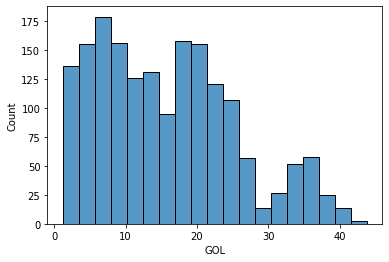

In [29]:
sns.histplot(acoes_df['GOL']);

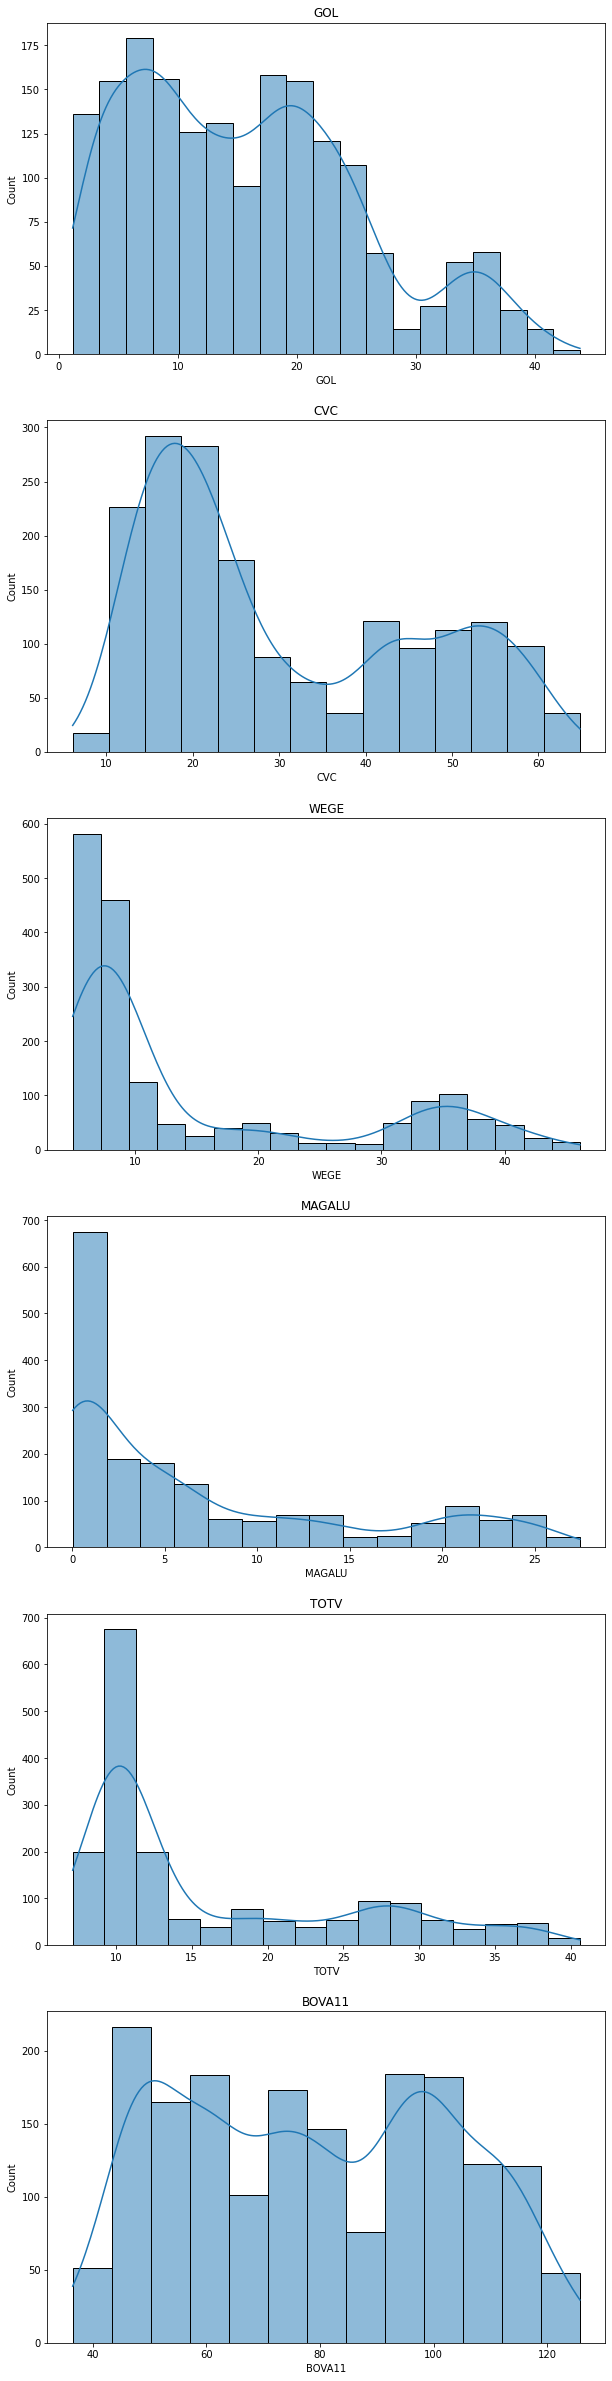

In [30]:
plt.figure(figsize = (10,50))
i =1
for i in np.arange(1,len(acoes_df.columns)):
  plt.subplot(7,1,i +1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

In [31]:
acoes_df['GOL'].describe()

count    1768.000000
mean       15.786867
std         9.718240
min         1.160000
25%         7.730000
50%        14.640000
75%        22.042500
max        43.790001
Name: GOL, dtype: float64

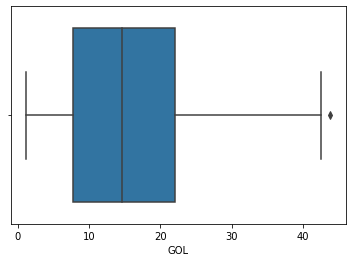

In [32]:
sns.boxplot(x = acoes_df['GOL']);

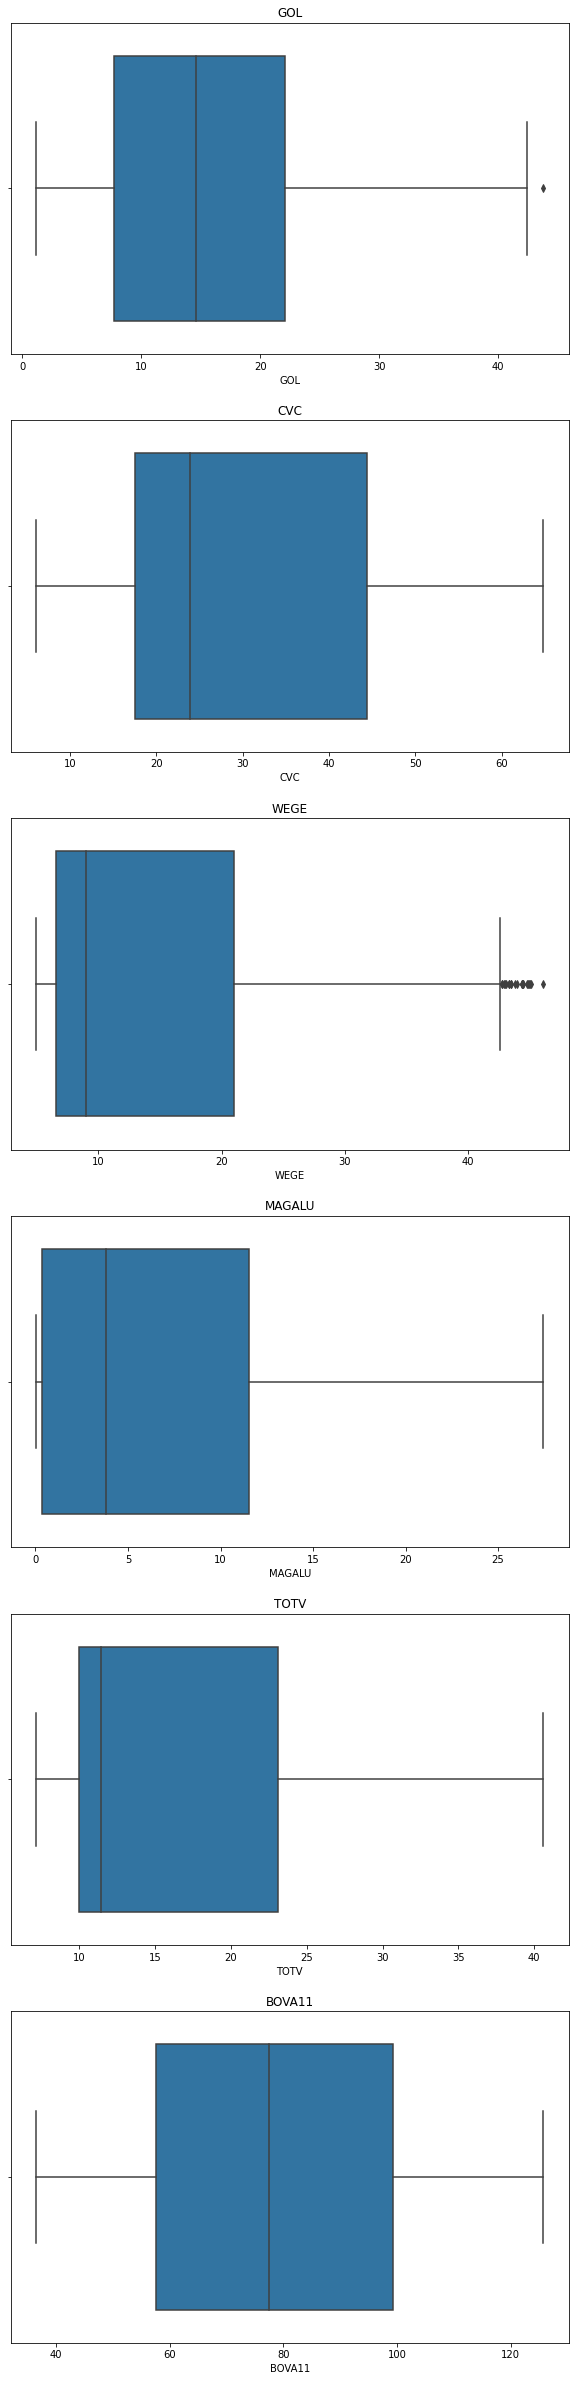

In [33]:
plt.figure(figsize = (10,50))
i =1
for i in np.arange(1,len(acoes_df.columns)):
  plt.subplot(7,1,i +1)
  sns.boxplot(x = acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

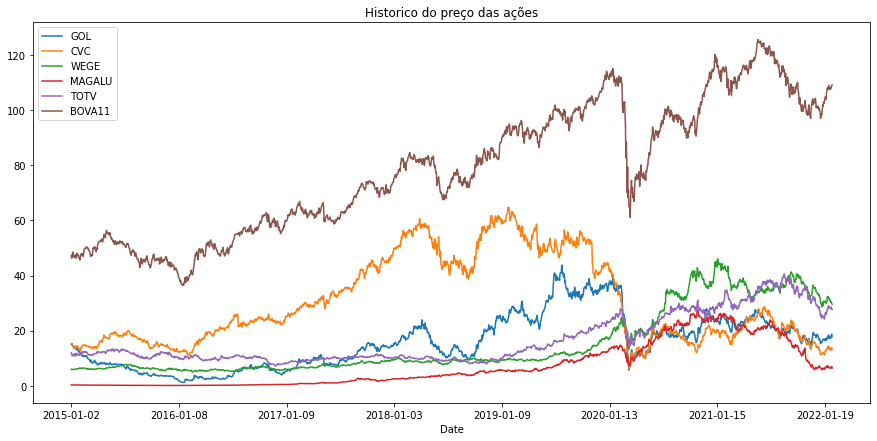

In [34]:
acoes_df.plot(x= 'Date', figsize=(15,7), title = 'Historico do preço das ações')

In [35]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [36]:
acoes_df_normalizado

,Date,GOL,CVC,WEGE,MAGALU,TOTV,BOVA11
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980520,1.038928,0.902235,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030875,0.923184,1.026449
...,...,...,...,...,...,...,...
1763,2022-02-07,1.148099,0.842763,5.233767,27.103413,2.387769,2.279306
1764,2022-02-08,1.170780,0.859211,5.102078,28.091335,2.346629,2.290097
1765,2022-02-09,1.220147,0.889474,5.113897,28.349053,2.392806,2.290097
1766,2022-02-10,1.244163,0.911184,5.021040,29.809460,2.325640,2.308506


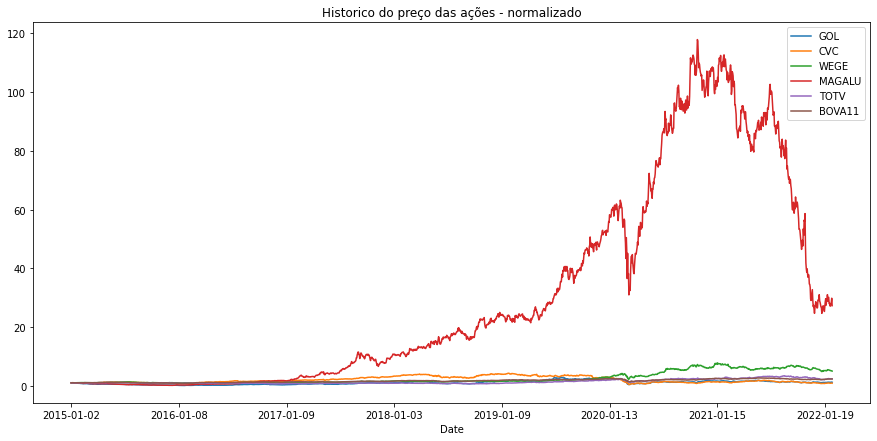

In [37]:
acoes_df_normalizado.plot(x= 'Date', figsize=(15,7), title = 'Historico do preço das ações - normalizado')

In [38]:
figura = px.line( title = ' historico do preço das ações')
for i in acoes_df.columns[1: ]:
  figura.add_scatter( x= acoes_df['Date'], y = acoes_df[i], name = i)
  figura.show()

In [39]:
figura = px.line( title = ' historico do preço das ações - normalizado')
for i in acoes_df_normalizado.columns[1: ]:
  figura.add_scatter( x= acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
  figura.show()